In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime


df = pd.read_excel("ts_medical_data_recleaned-14C.xlsx",index_col=0)
df



,year,month,Identificacion,1.Proteinuria1.g/L,2.Microalbuminuria1,3.HbA1C.1,4.Creatinuria.1,5.Creatinina.1,6.Glucemia1,7.Edad,...,39.Proteinuria2,40.Proteinuria3,41.FECHA.Proteinuria3,42.Microalbuminuria2,43.FECHA.Microalbuminuria2,44.Microalbuminuria3,44.FECHA.Microalbuminuria3,45.ParcialOrina,46.Corrected.TFG,47.Estadofinal
0,2013,2,562970,0.100,NaN,NaN,NaN,0.90,NaN,88.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,55.56,NaN
1,2013,10,562970,0.039,NaN,NaN,NaN,1.11,NaN,89.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,45.05,NaN
2,2014,12,562970,0.053,NaN,NaN,NaN,1.03,NaN,90.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,48.54,NaN
3,2015,12,562970,0.240,NaN,NaN,NaN,1.20,NaN,91.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,41.47,NaN
4,2017,3,562970,0.048,20.0,5.9,1320.0,1.19,82.0,92.0,...,23.0,19.0,2017-04-20,10.0,2016-11-25,10.0,2017-04-20,INACTIVO,42.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,2017,1,22096224,0.200,NaN,NaN,1987.0,0.93,115.0,77.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,46.26,vivo
4488,2017,4,22096224,0.250,2000.0,6.4,1765.0,1.05,130.0,77.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,40.30,vivo
4489,2017,7,22096224,NaN,1600.0,7.0,990.0,1.46,138.0,78.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,17.19,Fallecido
4490,2015,4,21599285,NaN,58.0,7.6,1900.0,0.89,127.0,87.0,...,NaN,NaN,NaT,NaN,NaT,NaN,NaT,ACTIVO,18.89,vivo


In [26]:
# Getting the dates as an intepretable column

import matplotlib.dates as mdates
month = pd.to_datetime(df['month'], format='%m').astype(str).str.split('-', expand=True)[1] # Month format
years_fmt = mdates.DateFormatter('%Y-%m')

date=df['year'].astype(str)+ month.astype(str)

Date = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(df['year'].astype(str), month.astype(str))])

df['Date']=Date

df['Date']


0      2013-02-01
1      2013-10-01
2      2014-12-01
3      2015-12-01
4      2017-03-01
          ...    
4487   2017-01-01
4488   2017-04-01
4489   2017-07-01
4490   2015-04-01
4491   2013-12-01
Name: Date, Length: 4492, dtype: datetime64[ns]

In [27]:
df.columns

Index(['year', 'month', 'Identificacion', '1.Proteinuria1.g/L',
       '2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '8.Sexo', '9.Nivel.ingresos',
       '10.Nivel.ingresos', '11.Estado.civil', '12.Tipo.afiliacion.SGSSS',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '18.EstadioRenal1', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria', '32.EPS',
       '33.IPS', '34.TipoID', '35.Fecha.ultimavalidacion',
       '36.creatinina3.mgdl', '37.TFG.calculada', '38.EstadioRenal2.calculado',
       '39.Proteinuria2', '40.Proteinuria3', '41.FECHA.Proteinuria3',
       '42.Microalbuminuria2', '43.FECHA.Microalbuminuria2',
  

# Some data visualization

(array([15737., 15765., 15796., 15826., 15857., 15887., 15918., 15949.,
        15979., 16010., 16040., 16071., 16102., 16130., 16161., 16191.,
        16222., 16252., 16283., 16314., 16344., 16375., 16405., 16436.,
        16467., 16495., 16526., 16556., 16587., 16617., 16648., 16679.,
        16709., 16740., 16770., 16801., 16832., 16861., 16892., 16922.,
        16953., 16983., 17014., 17045., 17075., 17106., 17136., 17167.,
        17198.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 

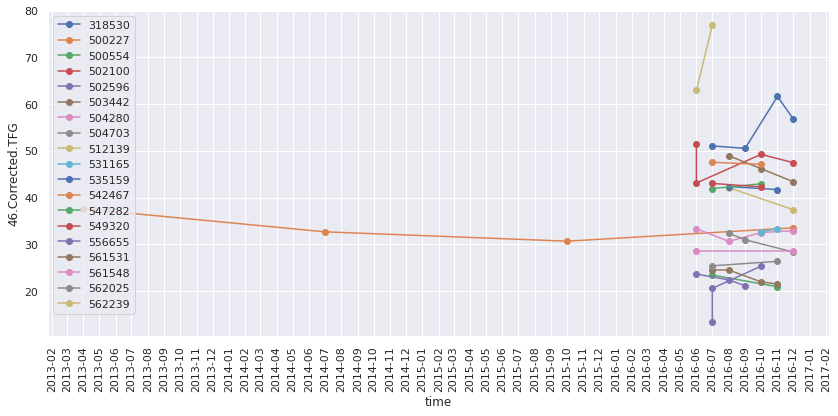

In [28]:
### corrected_calculated_tfg of 20 persons

years_fmt = mdates.DateFormatter('%Y')
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format
numids=30

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
i=10
for key, grp in df.sort_values(["month", "year"], ascending=True).groupby(["Identificacion"]):
    i+=1
    if i<numids:
        ax.plot(grp['Date'], grp['46.Corrected.TFG'], label=key, marker = 'o')

ax.set_xlabel('time')
ax.set_ylabel('46.Corrected.TFG')
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')



(array([15645., 15675., 15706., 15737., 15765., 15796., 15826., 15857.,
        15887., 15918., 15949., 15979., 16010., 16040., 16071., 16102.,
        16130., 16161., 16191., 16222., 16252., 16283., 16314., 16344.,
        16375., 16405., 16436., 16467., 16495., 16526., 16556., 16587.,
        16617., 16648., 16679., 16709., 16740., 16770., 16801., 16832.,
        16861., 16892., 16922., 16953., 16983., 17014., 17045., 17075.,
        17106., 17136., 17167., 17198., 17226., 17257., 17287., 17318.,
        17348., 17379., 17410., 17440., 17471., 17501., 17532., 17563.,
        17591., 17622., 17652., 17683., 17713., 17744., 17775., 17805.,
        17836., 17866.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  

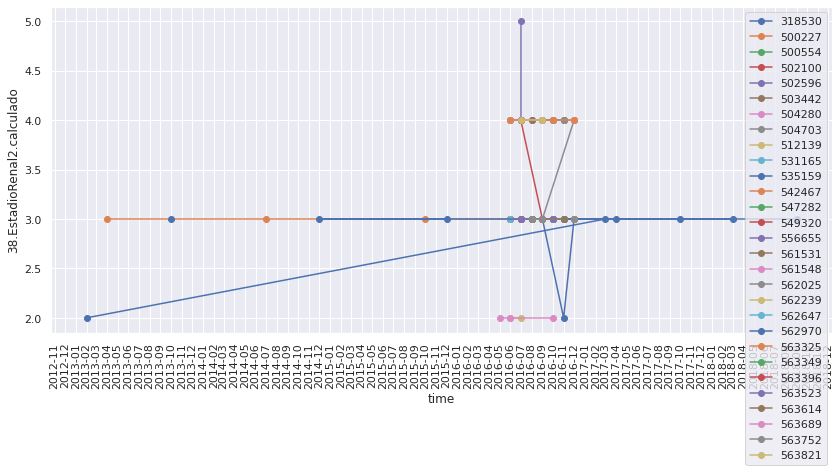

In [29]:
### calculated_EstadioRenal2 of 10 persons
years_fmt = mdates.DateFormatter('%Y')
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
i=0
for key, grp in df.sort_values(["month", "year"], ascending=True).groupby(["Identificacion"]):
    i+=1
    if i<numids:
        ax.plot(grp['Date'], grp['38.EstadioRenal2.calculado'], label=key, marker = 'o')

ax.set_xlabel('time')
ax.set_ylabel('38.EstadioRenal2.calculado')
ax.legend()

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.xticks(rotation = 'vertical')

<AxesSubplot:title={'center':'Most common months'}>

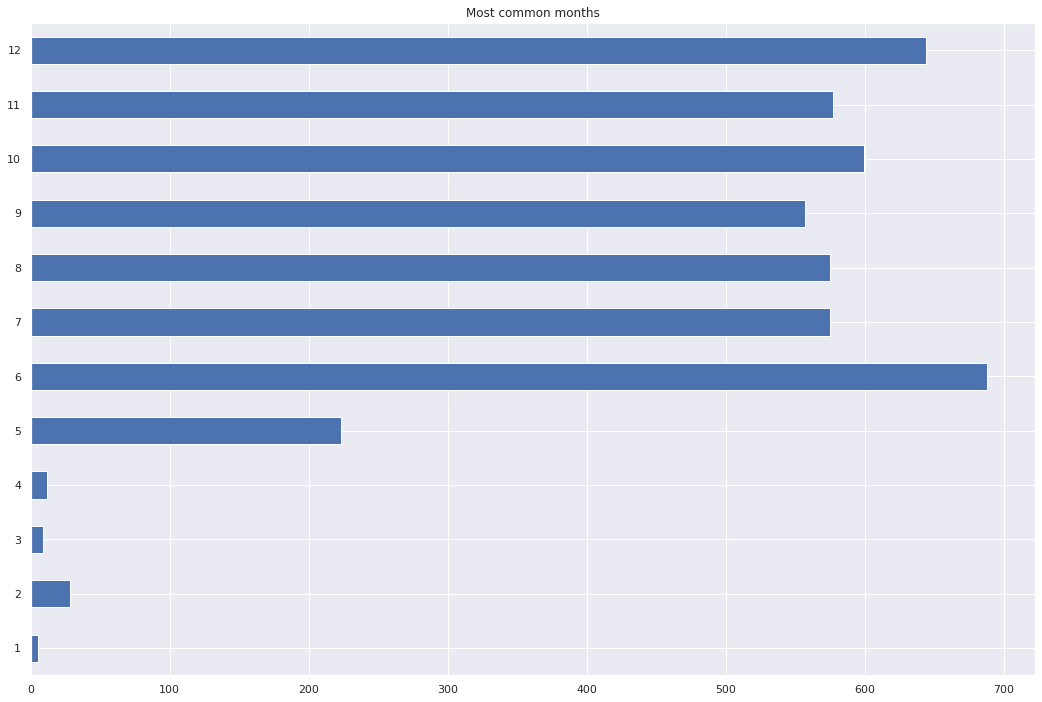

In [30]:
df['month'].value_counts().head(50).plot(kind='barh',figsize=(18,12),title='Most common months')

# Some data treatment and a heatmap

In [31]:
#FIRST REMOVE DUPLICATES and take the lowest tfg if the measure is in the same month

nodup = df.sort_values('46.Corrected.TFG',ascending=False).drop_duplicates(subset=['Date','Identificacion'], keep='last')

# SECOND Where most of the data is located
start_date = '2016-04-15'
end_date = '2016-12-15'

nodupsq=nodup[(nodup['Date'] > start_date) & (nodup['Date'] <= end_date)]

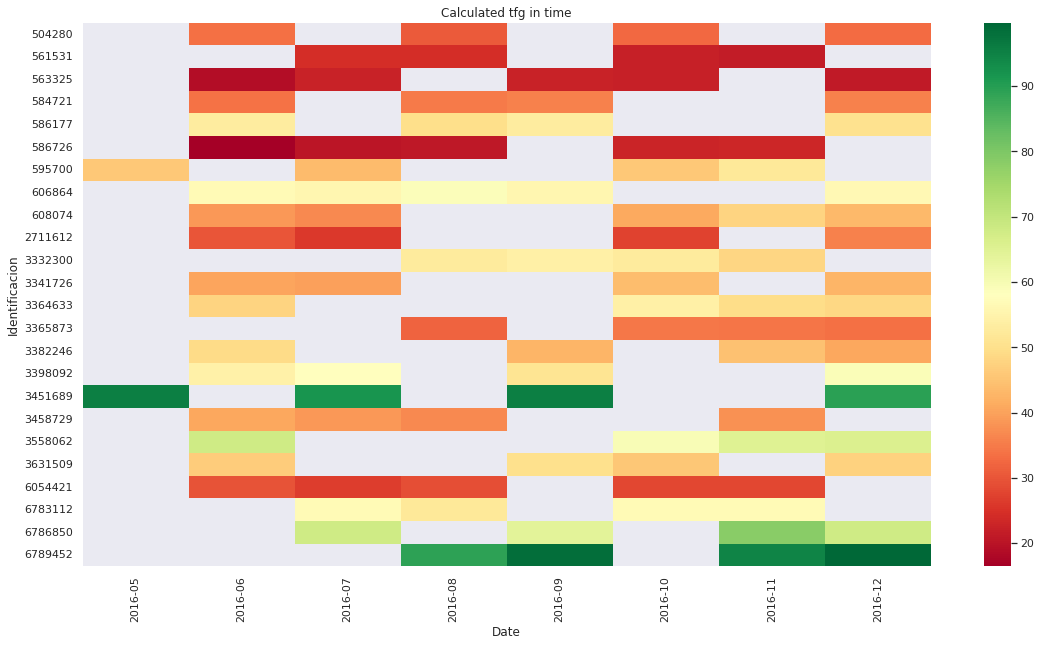

In [9]:
#Heatmap
import seaborn as sns
#25 diferent identifications and the heatmap

n=25
minimum_missin_vals=4


pivot = nodupsq.sort_values(["month", "year"], ascending=True).pivot(index='Identificacion', columns='Date', values='46.Corrected.TFG')

sns.set()
nodupsq
fig, ax = plt.subplots(figsize=(19,10))  # Sample figsize in inches


piv=pivot[pivot.isnull().sum(axis=1)<=minimum_missin_vals][1:n] # Selecting only the 25 Identifications that have 4 or less data misisng
ax = sns.heatmap(piv, ax=ax,cmap='RdYlGn')
years_fmt = mdates.DateFormatter('%Y-%m')
#ax.set_xticklabels(nodupsq['Date'].dt.strftime('%Y-%m'))
ax.set_xticklabels(piv.columns.strftime('%Y-%m'), rotation=90)
ax.set_title('Calculated tfg in time')
#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(months)
plt.show()

In [ ]:
Oridf=df.copy()

# Simple Random forest model of Corrected.TFG

In [10]:
# Now a random forest desicion tree to predict 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       '46.Corrected.TFG']################### Acá está el orden de las features

df=df[important_base_columns]

df = df[df['46.Corrected.TFG'].notna()]# Eliminating the ones that we dont have info of the prediction
features = pd.get_dummies(df)# Dummify the ones that can be dummified (Categoricals)


labels = np.array(features['46.Corrected.TFG'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('46.Corrected.TFG', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)




Training Features Shape: (2960, 33)
Training Labels Shape: (2960,)
Testing Features Shape: (987, 33)
Testing Labels Shape: (987,)


In [11]:
# Baseline errors, and display average baseline error
baseline_errors = abs(test_labels -df['46.Corrected.TFG'].mean())
print('Average baseline error: ', round(np.nanmean(baseline_errors), 2))


Average baseline error:  21.85


In [12]:
# Random forest training

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


In [13]:
# Error of the easiest random forest model

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg')

Mean Absolute Error: 4.61 calculated tfg


In [14]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.26 %.


Text(0.5, 0, 'Random Forest Feature Importance')

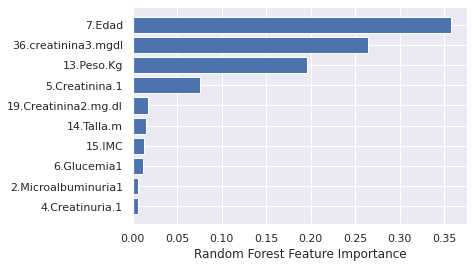

In [15]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

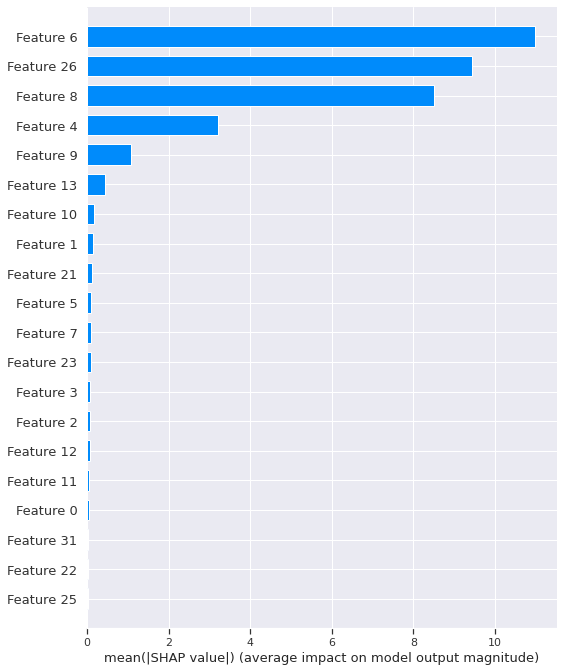

In [16]:
# Feature importance with SHAP
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar")


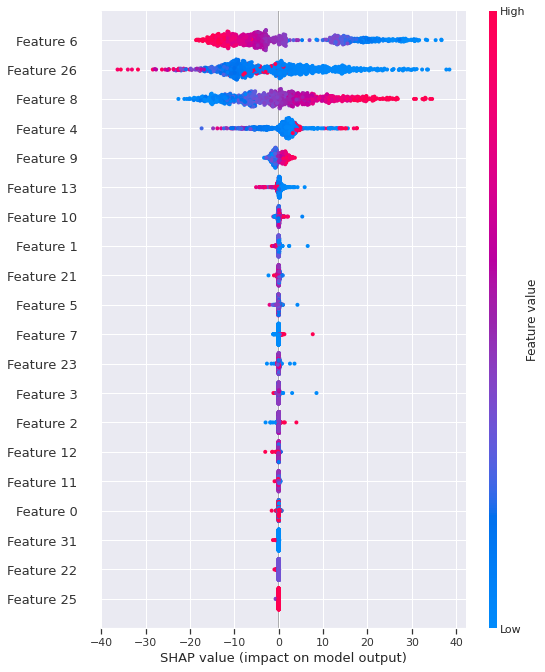

In [17]:
shap.summary_plot(shap_values, test_features_imp)# Arriba esta el orden de las features

In [18]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
# The dot file is converted to tree png online

ModuleNotFoundError: No module named 'pydot'

In [ ]:
from graphviz import render
render('dot', 'png', 'tree.dot')

In [ ]:
import pydot
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

# Time series Features

In [ ]:
df = Oridf.copy()

In [32]:
ndf=df.set_index([df['Identificacion'].rename('Id'),df['Date'].rename('date')]).copy(deep=True) # Remultiindexing to shift easier
ndf['tfg_before']=ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)

In [33]:
df['Identificacion']

0         562970
1         562970
2         562970
3         562970
4         562970
          ...   
4487    22096224
4488    22096224
4489    22096224
4490    21599285
4491    21801917
Name: Identificacion, Length: 4492, dtype: int64

In [34]:
ndf=df.set_index([df['Identificacion'].rename('Id'),df['Date'].rename('date')]).copy(deep=True) # Remultiindexing to shift easier
# The new feature of the last measure by id and date
ndf['tfg_before']=ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)

In [35]:
# The new feature of the change of the last measure
ndf['tfg_change']=ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(2)

In [36]:
y=ndf.groupby(level=0)['year'].shift(1)*12-ndf.groupby(level=0)['year'].shift(2)*12
m=ndf.groupby(level=0)['month'].shift(1)-ndf.groupby(level=0)['month'].shift(2)

ndf['tfgD_per_month_before']=ndf['tfg_change']/(y+m)

y1=(ndf.groupby(level=0)['year'].shift(0)-ndf.groupby(level=0)['year'].shift(1))*12
m1=ndf.groupby(level=0)['month'].shift(0)-ndf.groupby(level=0)['month'].shift(1)

k1=ndf.groupby(level=0)['46.Corrected.TFG'].shift(0)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(1)

ndf['tfgC_per_month_now']=k1/(y1+m1)

#  NEW model with New features and mean

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns =['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina','tfg_change','tfg_before',
       '46.Corrected.TFG']################### Acá está el orden de las features #

df=ndf[important_base_columns]

df = df[df['46.Corrected.TFG'].notna()]
features = pd.get_dummies(df)


labels = np.array(features['46.Corrected.TFG'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('46.Corrected.TFG', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (2960, 35)
Training Labels Shape: (2960,)
Testing Features Shape: (987, 35)
Testing Labels Shape: (987,)


In [82]:
# Random forest training

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


In [83]:
# Error of the easiest random forest model

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg')

Mean Absolute Error: 4.71 calculated tfg


Accuracy: 85.68 %.
R2 test:  0.8657039710959649
R2 train:  0.9785245050301681
sMAPE: 8.62 %.
RMSE:  10.24 NRMSE:  0.059


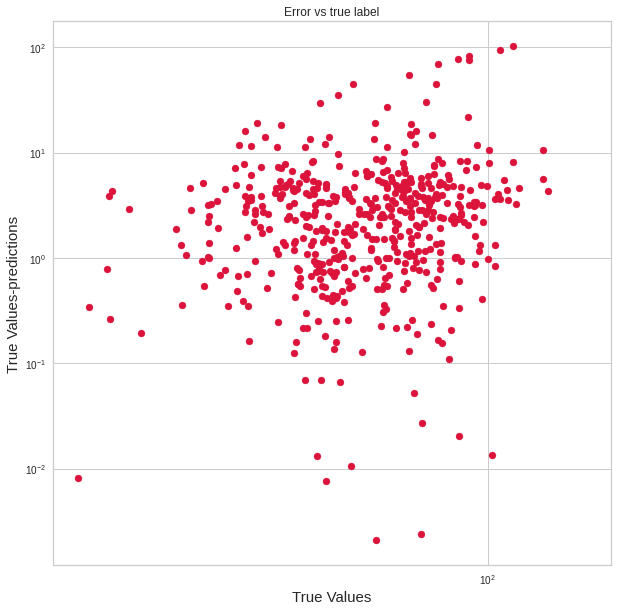

In [85]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

print ('R2 test: ',r2_score(test_labels, predictions))

print ('R2 train: ',r2_score(train_labels, rf.predict(train_features_imp)))

# Calculate and display accuracy

print('sMAPE:', round(smape(test_labels, predictions), 2), '%.')

MSE = np.square(np.subtract(test_labels,predictions)).mean() 
 
RMSE = math.sqrt(MSE)

NRMSE=RMSE/(test_labels.max()-test_labels.min())

print('RMSE: ',round(RMSE,3),'NRMSE: ',round(NRMSE,3))

# Plot of the error
plt.figure(figsize=(10,10))
plt.scatter(predictions, predictions-test_labels, c='crimson')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('True Values-predictions', fontsize=15)
plt.title('Error vs true label')

plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

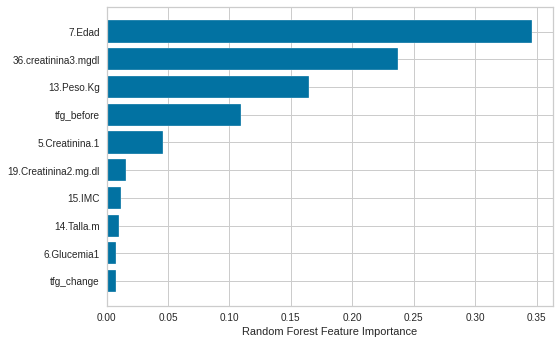

In [86]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

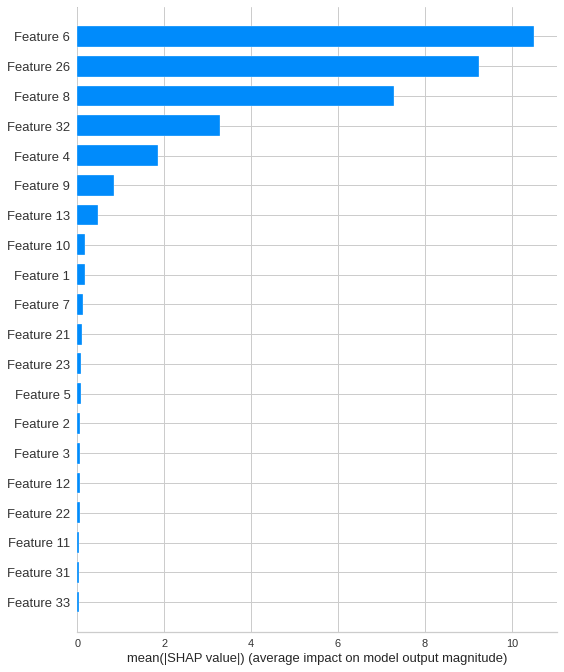

In [87]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar")

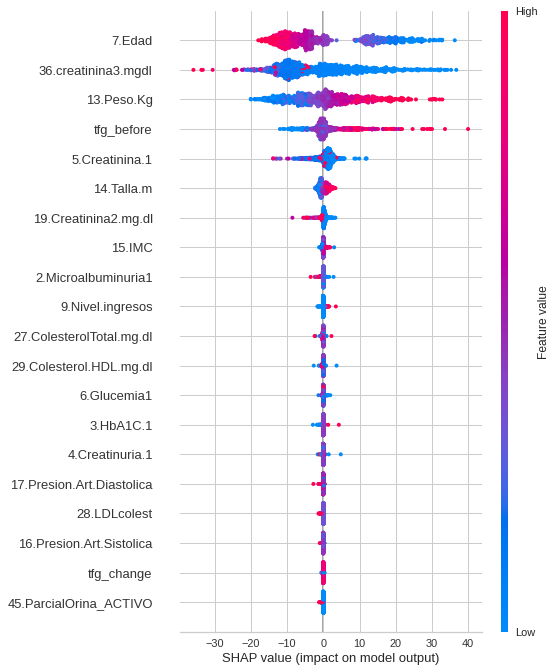

In [88]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

# Predicting the TFGchange/month in the actual measure based on actual values y_t-y_1

In [89]:
#Predicting tfgC_per_month_now
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       'tfgC_per_month_now']################### Acá está el orden de las features # 'tfgD_per_month_before'

df=ndf[important_base_columns]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['tfgC_per_month_now'].notna()]
features = pd.get_dummies(df)


labels = np.array(features['tfgC_per_month_now'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('tfgC_per_month_now', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Random forest training


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Training Features Shape: (1513, 33)
Training Labels Shape: (1513,)
Testing Features Shape: (505, 33)
Testing Labels Shape: (505,)


In [90]:
# Performance and error
import math

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(test_labels, predictions), 2), '%.')

MSE = np.square(np.subtract(test_labels,predictions)).mean() 
 
RMSE = math.sqrt(MSE)

NRMSE=RMSE/(test_labels.max()-test_labels.min())

print('RMSE: ',round(RMSE,3),'NRMSE: ',round(NRMSE,3))

Mean Absolute Error: 3.52 calculated tfg change/month
sMAPE: 147.85 %.
RMSE:  12.765 NRMSE:  0.047


Text(0.5, 0, 'Random Forest Feature Importance')

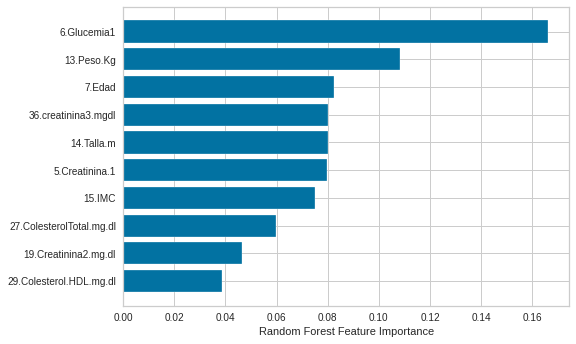

In [91]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

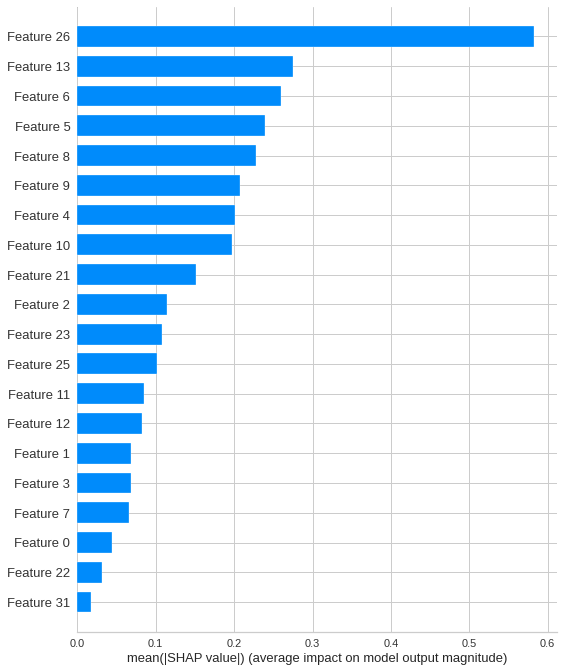

In [92]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar")

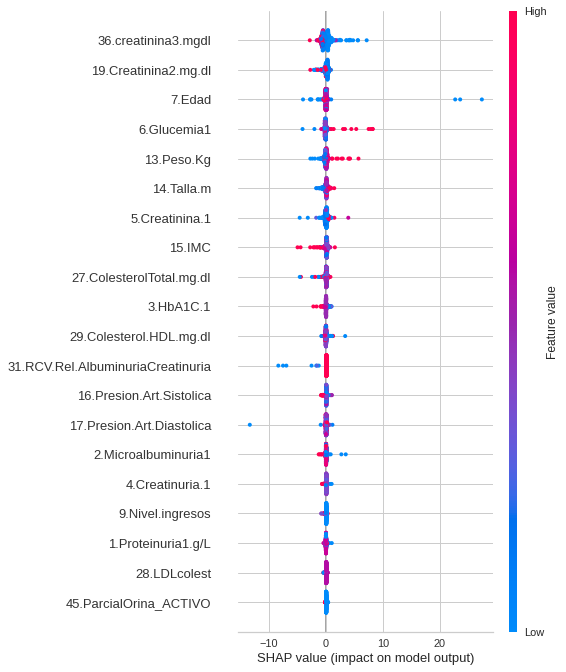

In [93]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

In [94]:
# Filtrar por los que van decreciendo en su falla renal, F-values, efectos de cada variable en el cambio. 
# Predecir el cambio, pero mal es el importante. Que es lo que me afecta cada uno de los cambios drásticos?


SyntaxError: unexpected EOF while parsing (3027789390.py, line 3)

# Another time series feature

In [95]:
#TIMESERIES:


y1=(ndf.groupby(level=0)['year'].shift(-1)-ndf.groupby(level=0)['year'].shift(0))*12
m1=ndf.groupby(level=0)['month'].shift(-1)-ndf.groupby(level=0)['month'].shift(0)

k1=ndf.groupby(level=0)['46.Corrected.TFG'].shift(-1)-ndf.groupby(level=0)['46.Corrected.TFG'].shift(0)

ndf['tfgC_per_month_next']=k1/(y1+m1)
    

# Predicting the change of tfg in the next measure based on actual values y_t+1-y_t

In [96]:
#Predicting tfgC_per_month_now
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# For now important features # Maybe here takeout the calculated estadio renal to see if it is as good
important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       'tfgC_per_month_next']################### Acá está el orden de las features # 'tfgD_per_month_before'

df=ndf[important_base_columns]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['tfgC_per_month_next'].notna()]
features = pd.get_dummies(df)


labels = np.array(features['tfgC_per_month_next'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('tfgC_per_month_next', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Random forest training


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Training Features Shape: (1513, 33)
Training Labels Shape: (1513,)
Testing Features Shape: (505, 33)
Testing Labels Shape: (505,)


Mean Absolute Error: 3.45 calculated tfg change/month
sMAPE: 151.57 %.
RMSE:  9.801 NRMSE:  0.052
R2 test:  -0.06579859700744639
R2 train:  0.821008185659807


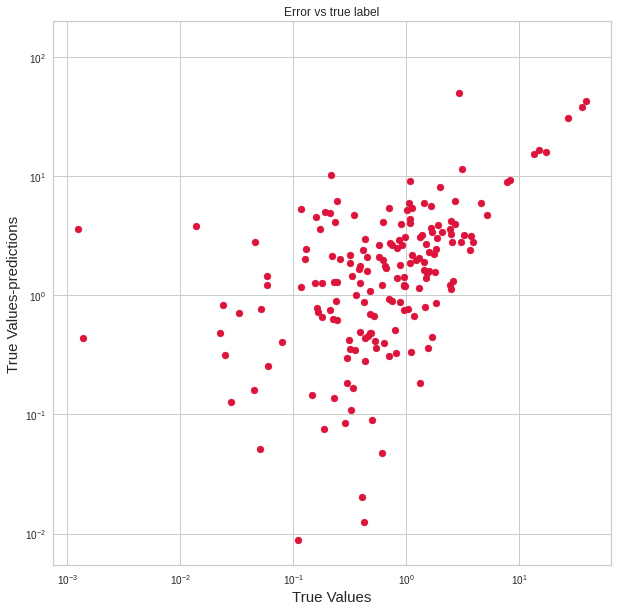

In [97]:
# Performance and error
import math

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(test_labels, predictions), 2), '%.')

MSE = np.square(np.subtract(test_labels,predictions)).mean() 
 
RMSE = math.sqrt(MSE)

NRMSE=RMSE/(test_labels.max()-test_labels.min())

print('RMSE: ',round(RMSE,3),'NRMSE: ',round(NRMSE,3))


print ('R2 test: ',r2_score(test_labels, predictions))

print ('R2 train: ',r2_score(train_labels, rf.predict(train_features_imp)))
plt.figure(figsize=(10,10))
plt.scatter(predictions, predictions-test_labels, c='crimson')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('True Values-predictions', fontsize=15)
plt.title('Error vs true label')

plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

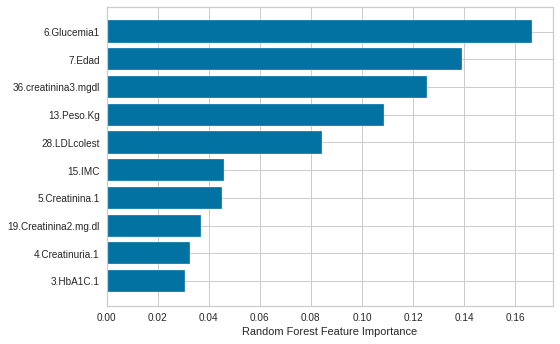

In [98]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

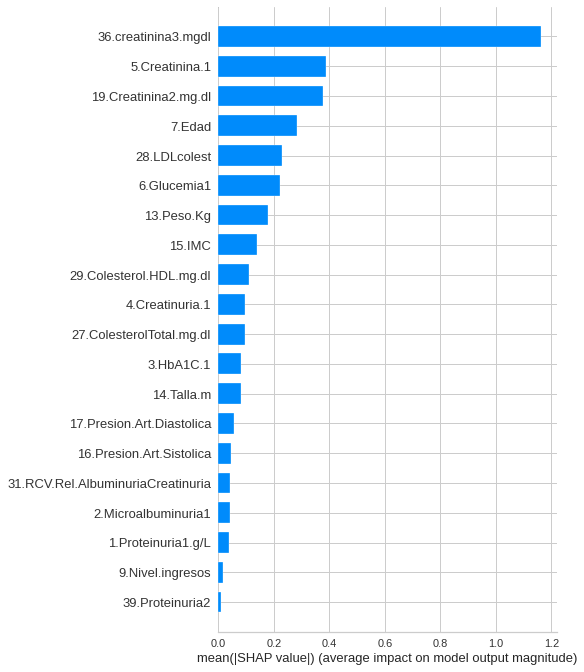

In [99]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)

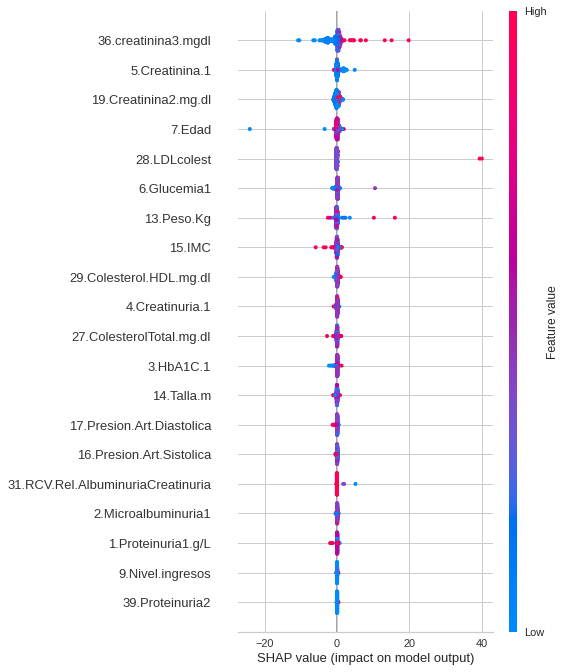

In [100]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features

# XGBoost model that doesn't need imputations

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


important_base_columns = ['1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1', '7.Edad', '9.Nivel.ingresos',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       'tfgC_per_month_next']################### Acá está el orden de las features # 'tfgD_per_month_before'

df=ndf[important_base_columns]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['tfgC_per_month_next'].notna()]
df = pd.get_dummies(df)
X, y = df.drop(columns=['tfgC_per_month_next']),df['tfgC_per_month_next']
feature_list=list(X.columns)

data_dmatrix = xgb.DMatrix(data=X,label=y,enable_categorical=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

NameError: name 'ndf' is not defined

In [102]:
#### Profiling the split of the dataset
#from pandas_profiling import ProfileReport
#import pandas as pd
#import matplotlib.pyplot as plt

#Pdf=X_train.copy()
#Pdf['Falla_renal']=y_train
#profile = ProfileReport(Pdf, title="Pandas Profiling Report", config_file="config_default.yaml")#.reset_index(drop=True).loc[:, important_base_columns]
#profile.to_file("profileTrain70REG.html")
                
#PdfTest = X_test.copy()
#PdfTest['Falla_renal'] = y_test
#profile = ProfileReport(PdfTest, title="Pandas Profiling Report", config_file="config_default.yaml")#.reset_index(drop=True).loc[:, important_base_columns]
#profile.to_file("profileTest30REG.html")

In [103]:
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
             missing=np.nan, monotone_constraints='()', n_estimators=140, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=27,
             reg_alpha=0)

In [104]:
# Tunning max_depth and min_child weight

from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,1),
 'min_child_weight':range(1,6,1)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_
gsearch1.best_estimator_

TypeError: __init__() got an unexpected keyword argument 'iid'

In [ ]:
# Tunning gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3,scoring= 'neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_
gsearch3.best_estimator_


In [ ]:
# tunning subsample and colsample
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5,scoring= 'neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_
gsearch5.best_estimator_.subsample,gsearch5.best_estimator_.colsample_bytree

In [ ]:
# tunning reg alpha
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6,scoring= 'neg_root_mean_squared_error',n_jobs=4, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.cv_results_
gsearch6.best_estimator_.reg_alpha


In [105]:
# reducing learning rate and incrementing trees for final model

xg_reg= xgb.XGBRegressor( learning_rate = 0.005, n_estimators=5000, max_depth=3,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27,reg_alpha = 1e-05)

In [106]:
from sklearn.metrics import r2_score

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

errors = abs(preds - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 4), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(y_test, preds), 3), '%.')

rmse = np.sqrt(mean_squared_error(y_test, preds))

NRMSE=rmse/(y_test.max()-y_test.min())

print('RMSE: ',round(rmse,4),'NRMSE: ',round(NRMSE,4))

print ('R2 test: ',r2_score(y_test, preds))

print ('R2 train: ',r2_score(y_train, xg_reg.predict(X_train)))

Mean Absolute Error: 3.5803 calculated tfg change/month
sMAPE: 147.369 %.
RMSE:  9.3054 NRMSE:  0.0374
R2 test:  -0.07305407308211898
R2 train:  0.7751073855504834


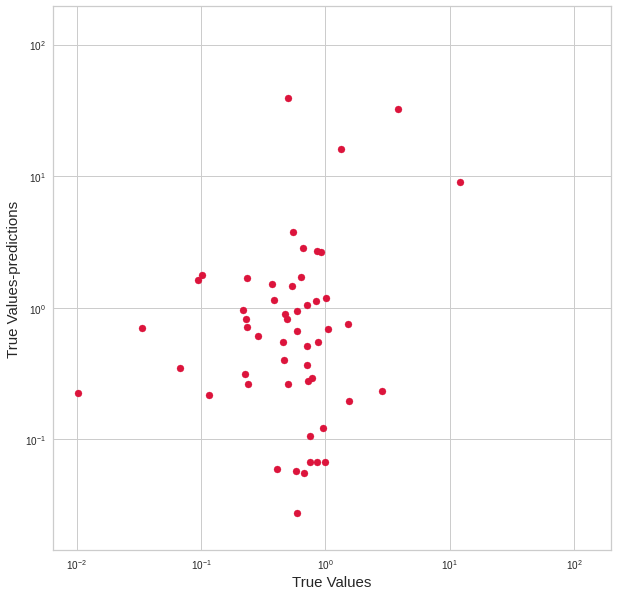

In [107]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds-y_test, c='crimson')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('True Values-predictions', fontsize=15)

plt.show()

[00:49:13] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


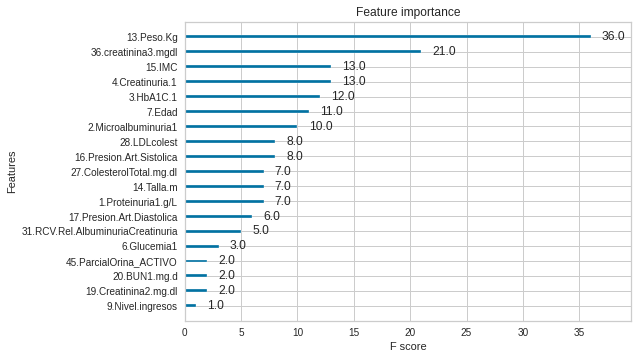

In [108]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

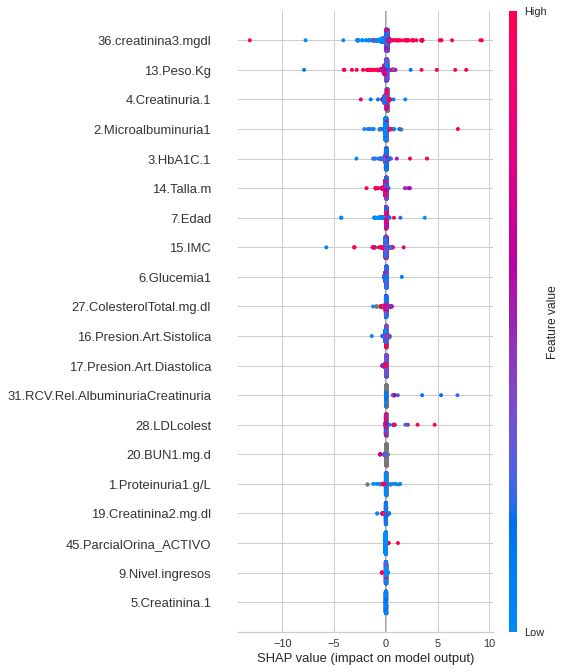

In [109]:
import shap
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(data_dmatrix)
shap.summary_plot(shap_values, X)

# Analysis of groups in ndf

In [110]:
######### Group bys de los deltas y variables importantes, como los estadios renales y ver comportamiento. Creatinina tambien

# Microalbuminurea, , proteinurea y sedimento variables a explorar que parecen ser importantes.

# HBA1C y Glucemia

# Creatinurea y BUN

# Diastolica y sistolica

In [111]:
from numpy import nanstd
from numpy import nanmean

fdf=ndf.copy()
fdf.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
fdf.groupby(["38.EstadioRenal2.calculado"]).agg({"tfgC_per_month_next": [nanmean, nanstd]})

tfgC_per_month_next           
                                       nanmean     nanstd
38.EstadioRenal2.calculado                               
1.0                                  -3.026191  18.127954
2.0                                   0.438537   5.000580
3.0                                   0.232271   3.058068
4.0                                   1.165422   7.387904
5.0                                   4.770024  18.926689

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


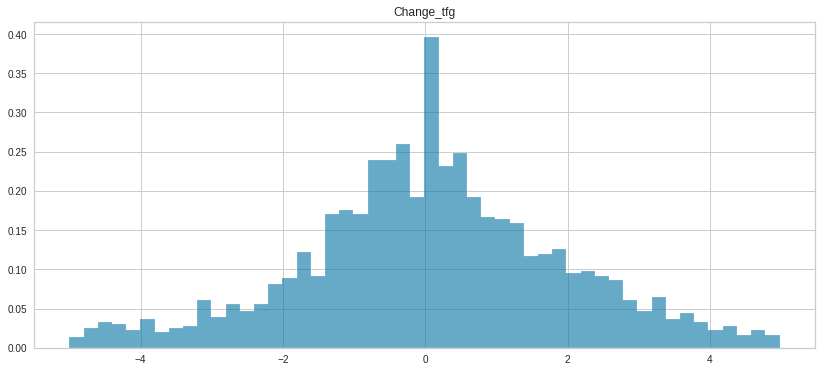

In [112]:
import matplotlib.pyplot as plt
minmax=5.0

fig, ax = plt.subplots(1, 1, figsize=(14, 6)) 
ax.hist(fdf[(fdf['tfgC_per_month_next']< minmax) & (fdf['tfgC_per_month_next']>-minmax)]['tfgC_per_month_next'], density=True, histtype='stepfilled',bins=50, alpha=0.6)#[df['5.Creatinina.1']>0]
ax.set_title('Change_tfg')
fig.show()

In [113]:
# Create buckets of the change to eassily groupby
bins = [-np.inf,-5, -2.5,0, 2.5,5, np.inf]
labels = ["<-5","-5--2.5","-2.5-0","0-2.5","2.5-5",">5"]
fdf['tfgC_CAT'] = pd.cut(fdf['tfgC_per_month_next'], bins=bins, labels=labels)
fdf.groupby(["tfgC_CAT"]).agg({"38.EstadioRenal2.calculado": [nanmean, nanstd]})

38.EstadioRenal2.calculado          
                            nanmean    nanstd
tfgC_CAT                                     
<-5                        1.961165  1.028251
-5--2.5                    2.335616  0.963309
-2.5-0                     2.629870  0.955113
0-2.5                      2.763689  0.875550
2.5-5                      2.379679  0.956143
>5                         2.508475  1.122769

In [114]:
fdf=ndf.copy()
fdf.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
fdf.groupby(["2.Microalbuminuria1"]).agg({"tfgC_per_month_next": [nanmean, nanstd]})
# Need to bucketize to better interpret

tfgC_per_month_next           
                                nanmean     nanstd
2.Microalbuminuria1                               
1.0                           -0.939780   3.115419
2.0                            0.361394   6.597629
3.0                           -0.414943   9.319859
4.0                           -1.185200  12.949716
5.0                           -0.749853  11.593198
...                                 ...        ...
1200.0                        -3.800000        NaN
1600.0                        -6.170000        NaN
1800.0                        -1.300000        NaN
2000.0                        -7.703333        NaN
2500.0                         0.137200        NaN

[229 rows x 2 columns]

In [ ]:
ndf.columns


# Log transforming the Dy the data before and then rf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
Non_Categorical_variables = [ '1.Proteinuria1.g/L','2.Microalbuminuria1', '3.HbA1C.1', '4.Creatinuria.1', '5.Creatinina.1',
       '6.Glucemia1',
       '13.Peso.Kg', '14.Talla.m', '15.IMC', '16.Presion.Art.Sistolica',
       '17.Presion.Art.Diastolica', '19.Creatinina2.mg.dl',
       '20.BUN1.mg.d', '21.Albúmina2', '22.Glucemia2.mg.dl', '23.HbA1C2',
       '24.Calcio.mg.dl', '25.Fosforo.mEq.L.l', '26.PTH.mg.dl',
       '27.ColesterolTotal.mg.dl', '28.LDLcolest', '29.Colesterol.HDL.mg.dl',
       '30.Hemoglobina.mg.dl', '31.RCV.Rel.AlbuminuriaCreatinuria',
       '36.creatinina3.mgdl',
       '39.Proteinuria2', '40.Proteinuria3',
       '42.Microalbuminuria2',
       '44.Microalbuminuria3', '45.ParcialOrina',
       'tfgC_per_month_next']
    
Categorical_variablesK=['7.Edad', '9.Nivel.ingresos']

ldf=ndf[Non_Categorical_variables]

numeric_df = ldf.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)
numeric_df[Categorical_variablesK[0]]=ndf[Categorical_variablesK[0]]
numeric_df[Categorical_variablesK[1]]=ndf[Categorical_variablesK[1]]

df=numeric_df[:]

df.replace([np.inf, -np.inf], np.nan, inplace=True)# Making infinities NaNs
df = df[df['tfgC_per_month_next'].notna()]
features = pd.get_dummies(df)


labels = np.array(features['tfgC_per_month_next'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('tfgC_per_month_next', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Fill missing Nas with the mean for now
imp = SimpleImputer(missing_values=np.nan, strategy='mean')



# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Random forest training


# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)



# Impute NANs
imp = imp.fit(train_features)
train_features_imp = imp.transform(train_features)

# Train the model on training data
rf.fit(train_features_imp, train_labels);

In [57]:
# Performance and error
import math

test_features_imp = imp.transform(test_features)
predictions = rf.predict(test_features_imp)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'calculated tfg change/month')


def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)


# Calculate and display accuracy

print('sMAPE:', round(smape(test_labels, predictions), 2), '%.')

MSE = np.square(np.subtract(test_labels,predictions)).mean() 
 
RMSE = math.sqrt(MSE)

NRMSE=RMSE/(test_labels.max()-test_labels.min())

print('RMSE: ',round(RMSE,3),'NRMSE: ',round(NRMSE,3))

print ('R2 test: ',r2_score(test_labels, predictions))

print ('R2 train: ',r2_score(train_labels, rf.predict(train_features_imp)))



Mean Absolute Error: 0.95 calculated tfg change/month
sMAPE: 130.02 %.
RMSE:  1.23 NRMSE:  0.17
R2 :  0.04474921769600004
R2 train:  0.8822108239023325


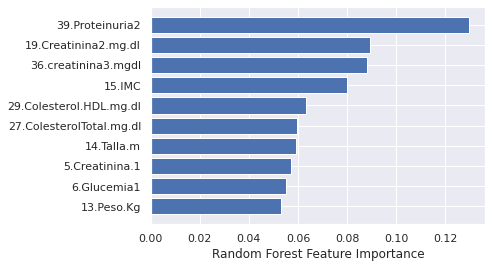

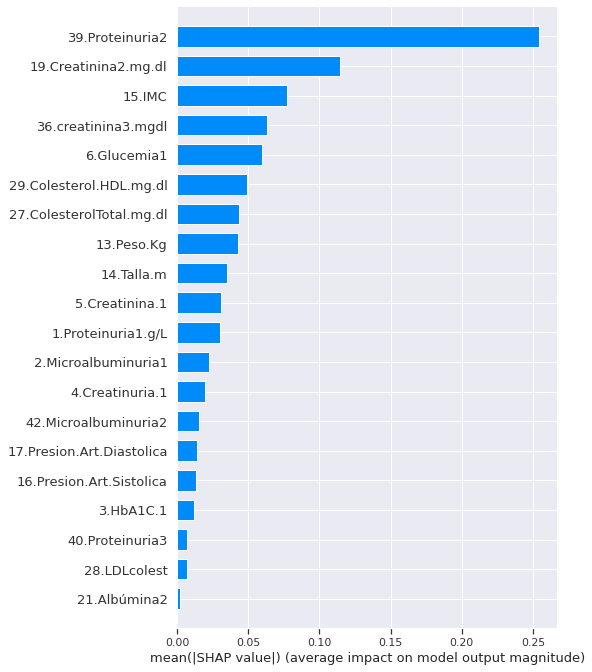

In [51]:
# FEature importance
# Number of features to see:
ns=10
tot=len(rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()[tot-ns:]
sortfeat=[]
for i in sorted_idx:
    sortfeat.append(feature_list[i])
sortfeat
plt.barh(sortfeat, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features_imp)
shap.summary_plot(shap_values, test_features_imp, plot_type="bar",feature_names=feature_list)

In [ ]:
shap.summary_plot(shap_values, test_features_imp,feature_names=feature_list)# Arriba esta el orden de las features